<a href="https://colab.research.google.com/github/kaushiksrini/cs482-finalproject/blob/master/cs482_finalproject_SNP_only_4mer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import sklearn.model_selection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
"""file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))"""

nbp = drive.CreateFile({'id': '1H_pbNqLMrLqisLwqDP4SNF5AejrBw6XX'})
nbp.GetContentFile('nbp.csv')
bp = drive.CreateFile({'id': '1ENXkJyRRy45TK4SntiGrmxY1jF6qTx-r'})
bp.GetContentFile('bp.csv')

In [4]:
def char_to_val(char):
  if char == 'a':
    return 0
  if char == 't':
    return 1
  if char == 'c':
    return 2
  if char == 'g':
    return 3
  raise UnexpectedNucleotideError(char)

"""with open('nbp.csv', 'r') as f:
  nbp = list(csv.reader(f, delimiter=','))
with open('bp.csv', 'r') as f:
  bp = list(csv.reader(f, delimiter=','))"""

#nbp = [nbp[i][0] + nbp[i][1] for i in range(len(nbp))]
#bp = [bp[i][0] + nbp[i][1] for i in range(len(bp))]

def deconstruct(data):
  for i in range(len(data)):
    data[i] = [char_to_val(x) for x in data[i]]

#deconstruct(nbp)
#deconstruct(bp)

  
df_nbp = pd.read_csv('nbp.csv', header=None)
print(df_nbp.shape)
df_bp = pd.read_csv('bp.csv', header=None)
print(df_bp.shape)

(48643, 102)
(2699, 102)


In [32]:
def to_categorical(df):
  for col in df:
    df[col] = df[col].astype('category')
    
def dont_use_gene(df):
  for i, col in enumerate(df):
    if i < 96:
      df.drop([col], axis=1, inplace=True)
    else:
      break


df_nbp['Brain'] = 1
df_bp['Brain'] = 0
df_total = df_nbp.append(df_bp)

y = df_total['Brain']
df_total.drop(['Brain'], axis=1, inplace=True)
x = df_total

dont_use_gene(x)
to_categorical(x)
x = pd.get_dummies(x)

print(x.shape)
print(y.shape)
x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_train, y_train, test_size=0.25, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(51342, 1522)
(51342,)
(30804, 1522)
(10269, 1522)
(30804,)
(10269,)
(10269, 1522)
(10269,)


In [0]:
# y_test.head(100)

In [0]:
from keras import optimizers
from keras import models
from keras import layers
from keras import metrics
from keras.layers import Dense, Activation

In [0]:
model = models.Sequential()
model.add(Dense(100, activation='relu', input_dim=1522))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

Train on 30804 samples, validate on 10269 samples
Epoch 1/10
30804/30804 [==============================] - 8s 259us/step - loss: 0.0857 - acc: 0.9761 - val_loss: 0.0335 - val_acc: 0.9912
Epoch 2/10
30804/30804 [==============================] - 8s 246us/step - loss: 0.0184 - acc: 0.9953 - val_loss: 0.0264 - val_acc: 0.9947
Epoch 3/10
30804/30804 [==============================] - 8s 246us/step - loss: 0.0089 - acc: 0.9976 - val_loss: 0.0270 - val_acc: 0.9964
Epoch 4/10
30804/30804 [==============================] - 8s 247us/step - loss: 0.0058 - acc: 0.9986 - val_loss: 0.0258 - val_acc: 0.9963
Epoch 5/10
30804/30804 [==============================] - 8s 246us/step - loss: 0.0048 - acc: 0.9987 - val_loss: 0.0287 - val_acc: 0.9963
Epoch 6/10
30804/30804 [==============================] - 8s 244us/step - loss: 0.0042 - acc: 0.9989 - val_loss: 0.0283 - val_acc: 0.9963
Epoch 7/10
30804/30804 [==============================] - 8s 247us/step - loss: 0.0042 - acc: 0.9989 - val_loss: 0.0251 - 

In [36]:
from sklearn.metrics import accuracy_score
y_preds = model.predict(x_test)
print(accuracy_score(y_test, np.round(y_preds)))

0.9951309767260688


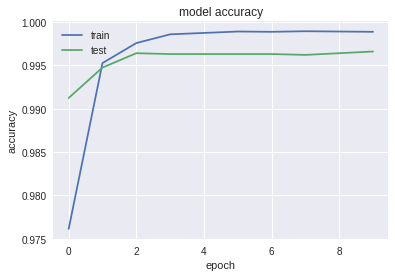

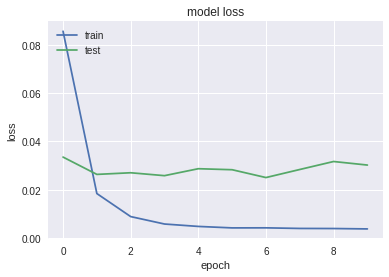

In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()